In [1]:
import numpy as np
import sys
sys.path.append('../')
import torch.optim as optim
from dataset import *
from model import *
import torch.nn.init as init
from sklearn.preprocessing import MinMaxScaler
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt

4.061614005993574


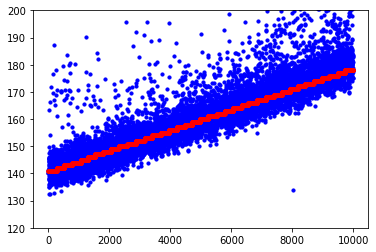

In [16]:
s_or_d = "s"
unrelated_feature_number = 32
feature_number = 35

batchsize = 32


criterion = nn.L1Loss()
criterion = criterion.cuda()
# model = MLP(feature_number).cuda()
model = torch.load("../pth/tmp_20_4.62.pth")

test_dataset = Dataset("../data/features_rand_test.npy", s_or_d, "test", unrelated_feature_number)
test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=True, drop_last=True)

loss_test = 0
step = 0
label = []
prediction = []
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        # print(target.shape)
        label = np.append(label, target.numpy().reshape(batchsize))
        
        data, target = data.cuda(), target.cuda()
        output = model(data)
        
        prediction = np.append(prediction, output.cpu().numpy().reshape(batchsize))

        loss = criterion(output, target)

        loss_test = loss_test + loss.item()
        step = step + 1

    loss_mean = loss_test / step
    print(loss_mean)

    
sorted_id = sorted(range(len(label)), key=lambda k: label[k])

plt.scatter(np.arange(len(label)), prediction[sorted_id], s = 10, c = 'b')
plt.scatter(np.arange(len(label)), label[sorted_id], s = 10, c = 'r')

plt.ylim(120,200)
plt.show()